# **Лабораторная работа №3** "Метрические методы"
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://archive.ics.uci.edu/dataset/236/seeds

## **Первичный анализ**

### Общее описание набора данных "seeds"

Данный набор данных содержит информацию о различных видах семян зерновых культур. Он включает 210 экземпляров с 7 признаками, все из которых являются численными.

### Описание признаков

1. **area** - площадь семени, мм^2
2. **perimeter** - периметр семени, мм 
3. **compactness** - коэффициент компактности (4*pi*area/perimeter^2)
4. **length** - длина семени, мм
5. **width** - ширина семени, мм
6. **asymmetry** - асимметрия семени 
7. **groove** - глубина бороздки на семени, мм

### Характеристики данных

- Количество элементов (Instances): 210
- Количество признаков (Features): 7
- Связанные задачи: Многоклассовая классификация
- Характеристики набора данных: Многомерные (Multivariate) 
- Тип признаков: Численные (Numeric)

### Распределение классов

Данный набор данных содержит 3 класса, соответствующие 3 различным видам семян зерновых культур. Распределение классов следующее:
- Класс 1: 70 экземпляров
- Класс 2: 70 экземпляров 
- Класс 3: 70 экземпляров

Это показывает, что данные сбалансированы, т.е. каждый класс представлен одинаковым количеством экземпляров, что упрощает задачу многоклассовой классификации.

Таким образом, данный набор данных "seeds" представляет интерес для разработки и оценки моделей классификации различных видов семян зерновых культур на основе предоставленных характеристик.

## Задание

Импорт библиотек для работы с данными (Pandas, NumPy), визуализации (Seaborn, Matplotlib), машинного обучения (Scikit-learn). Отключение вывода предупреждений.

In [25]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

Загрузка данных из CSV-файла "seeds.csv" с разделителем-табуляцией в DataFrame d, затем вывод содержимого DataFrame.

In [26]:
d = pd.read_table('seeds.csv', delimiter = '\t')
d

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Создание словаря palette для сопоставления целевой переменной "Type" с цветами, затем построение матрицы диаграмм рассеяния pairplot с раскраской по классам.

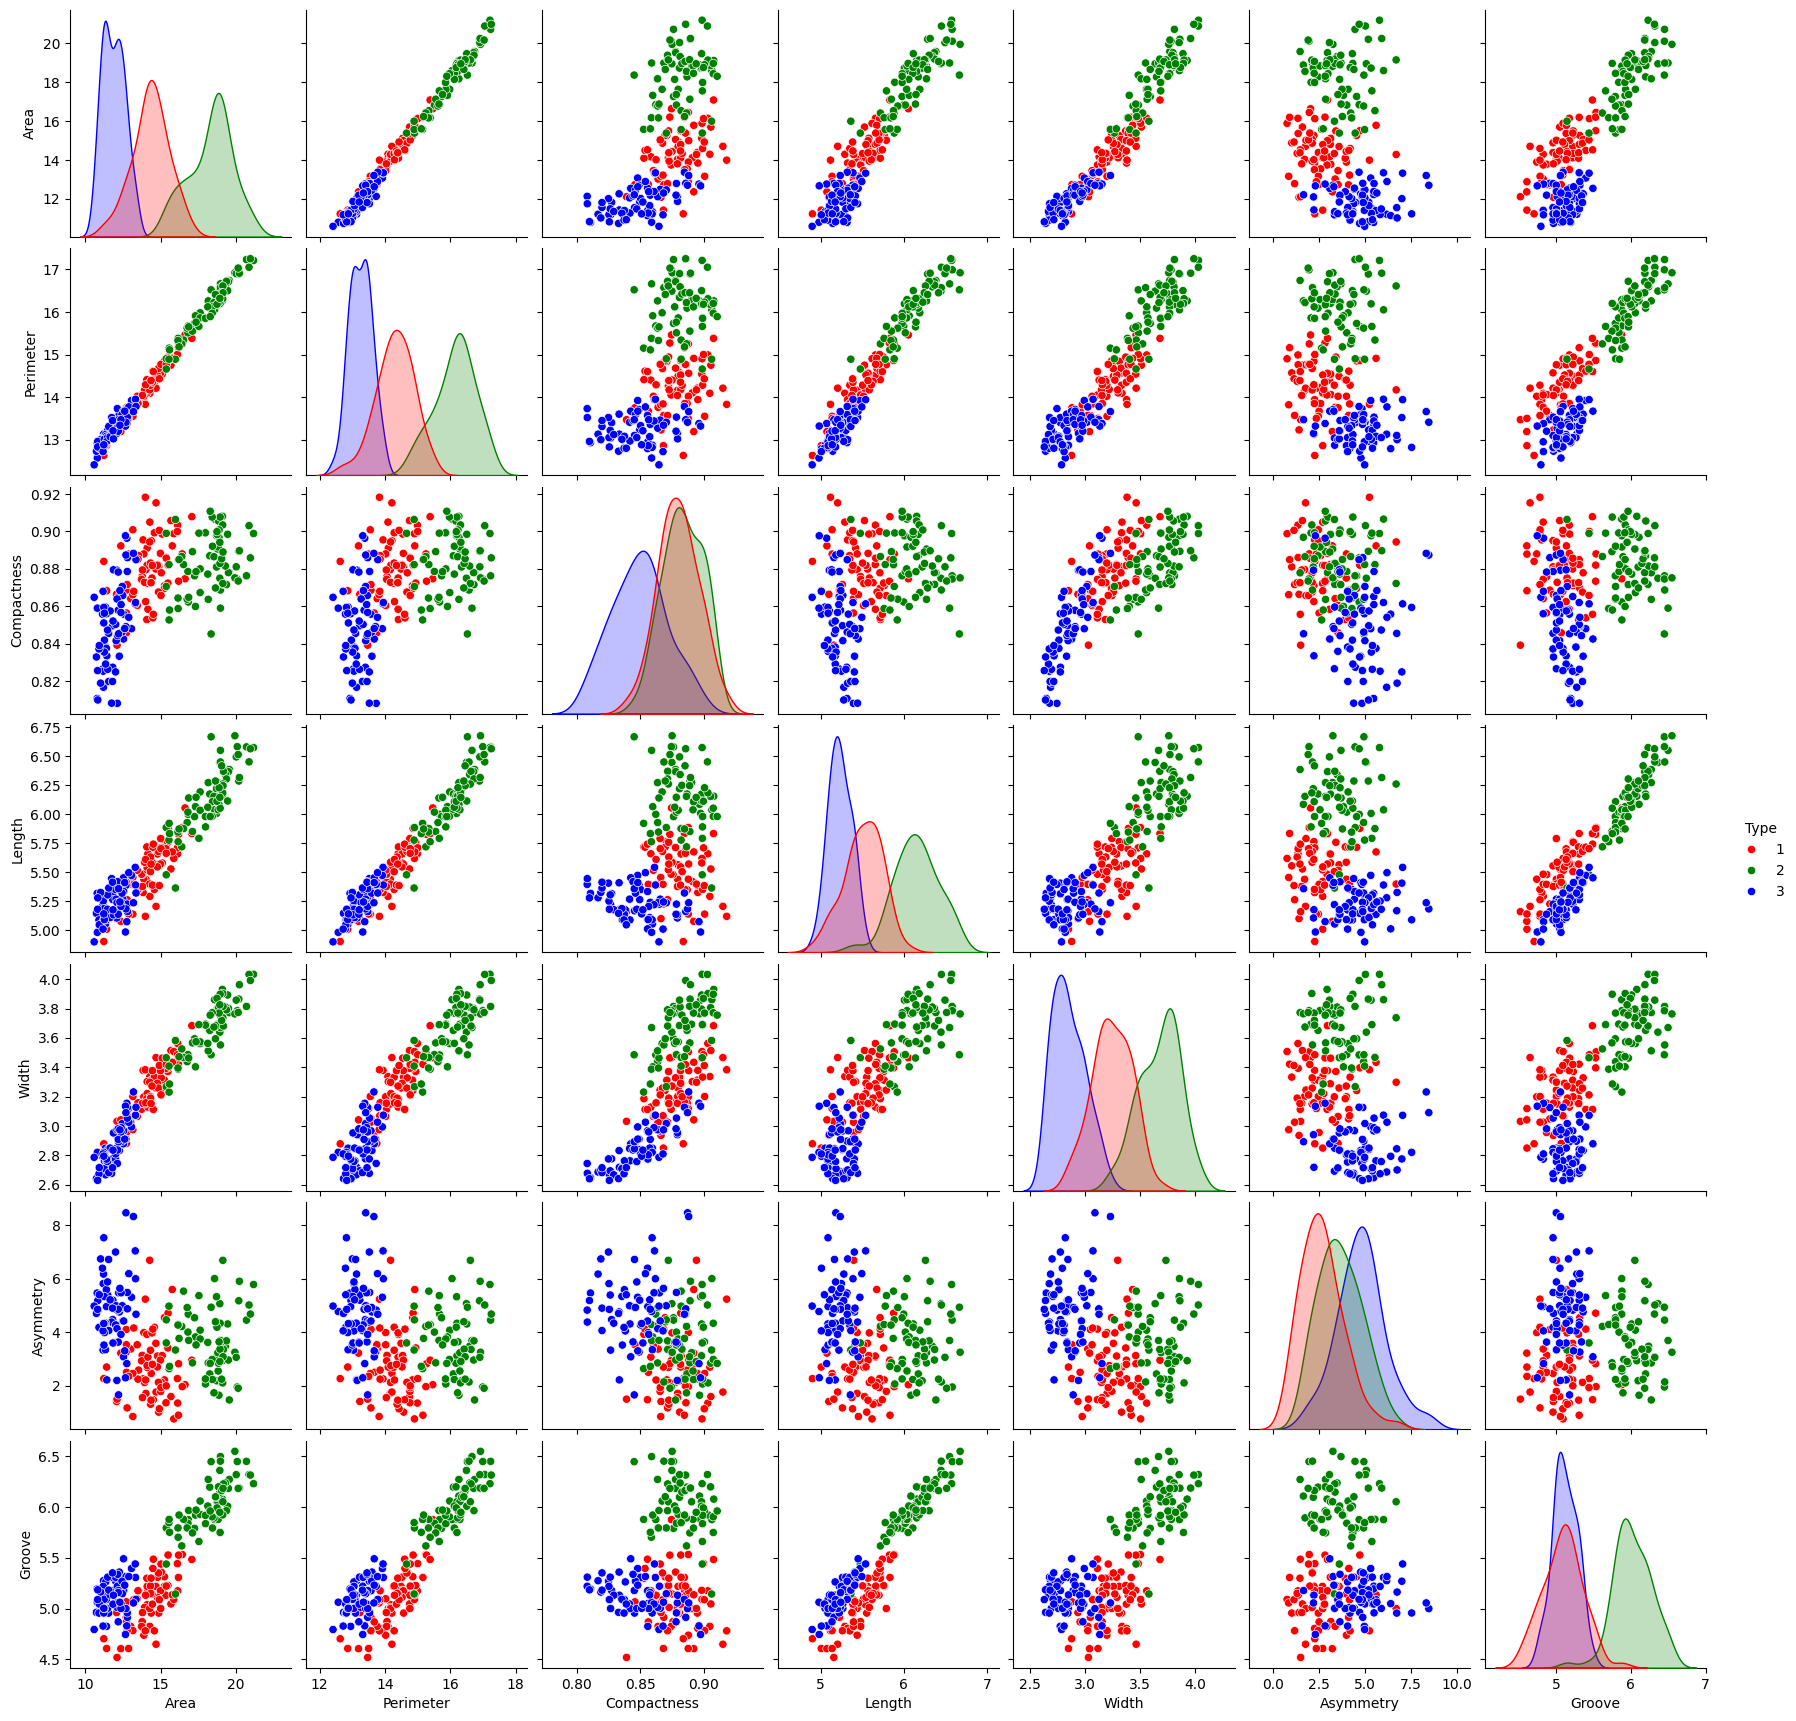

In [10]:
palette = {1: 'r', 2: 'g', 3: 'b', 4: 'y', 5: 'm', 6: 'c', 7: 'k'}

sb.pairplot(d, hue = "Type", palette=palette)

Выделение признаков и целевой переменной из DataFrame d для дальнейшего использования в задаче.

In [35]:
X_train = d[['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove']]
y_train = d['Type']

Создание и обучение классификатора с количества ближайших соседей 3

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Подготовка и предсказание классов тестовых данных

In [39]:
X_test_1 = np.array([[15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]])
X_test_2 = np.array([[14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956]])
X_test_3 = np.array([[14.29, 14.09, 0.905, 5.291, 3.337, 2.699, 4.825]])

target_1 = knn.predict(X_test_1)
target_2 = knn.predict(X_test_2)
target_3 = knn.predict(X_test_3)

Вывод результата

In [40]:
print("Предсказанный класс для тестовых данных 1:", target_1)
print("Предсказанный класс для тестовых данных 2:", target_2)
print("Предсказанный класс для тестовых данных 3:", target_3)

Предсказанный класс для тестовых данных 1: [1]
Предсказанный класс для тестовых данных 2: [1]
Предсказанный класс для тестовых данных 3: [1]


Перебор различных значений доли тестовой выборки и количества соседей для модели k-ближайших соседей, вычисление и сохранение точности классификации на каждой итерации.

In [45]:
test_sizes = [0.1, 0.2, 0.3]
accuracies = []

for test_size in test_sizes:
    for k in range(1, 11):
        X_train, X_holdout, y_train, y_holdout = train_test_split(d[['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove']],
                                                                  d['Type'],
                                                                  test_size=test_size,
                                                                  random_state=17)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_holdout)
        accuracies.append(accuracy_score(y_holdout, knn_pred))

Вывод результатов

In [34]:
print('Оценки hold-out для различных значений K и долей обучающей и тестирующей подвыборок:')
for i, test_size in enumerate(test_sizes):
    print(f'Доля обучающей выборки: {1 - test_size}')
    for j in range(1, 11):
        print(f'K = {j}: {accuracies[i * 10 + j - 1]}')
    print()

Оценки hold-out для различных значений K и долей обучающей и тестирующей подвыборок:
Доля обучающей выборки: 0.9
K = 1: 0.8571428571428571
K = 2: 0.9047619047619048
K = 3: 0.9047619047619048
K = 4: 0.9047619047619048
K = 5: 0.8571428571428571
K = 6: 0.7142857142857143
K = 7: 0.8095238095238095
K = 8: 0.7619047619047619
K = 9: 0.8095238095238095
K = 10: 0.8095238095238095

Доля обучающей выборки: 0.8
K = 1: 0.8809523809523809
K = 2: 0.9047619047619048
K = 3: 0.9047619047619048
K = 4: 0.9285714285714286
K = 5: 0.8809523809523809
K = 6: 0.8571428571428571
K = 7: 0.9047619047619048
K = 8: 0.8571428571428571
K = 9: 0.8571428571428571
K = 10: 0.8571428571428571

Доля обучающей выборки: 0.7
K = 1: 0.8888888888888888
K = 2: 0.9047619047619048
K = 3: 0.9047619047619048
K = 4: 0.9047619047619048
K = 5: 0.873015873015873
K = 6: 0.8888888888888888
K = 7: 0.873015873015873
K = 8: 0.8571428571428571
K = 9: 0.873015873015873
K = 10: 0.873015873015873



Построение графика зависимости средней точности от количества соседей (K) в модели k-ближайших соседей с использованием 10-кратной кросс-валидации.

In [ ]:
#Создание списка значений K
k_list = list(range(1, 50))

#Инициализация списка для хранения оценок кросс-валидации
cv_scores = []

#Цикл по значениям K
for k in k_list:
    # Создание экземпляра классификатора K ближайших соседей с заданным количеством соседей
    knn = KNeighborsClassifier(n_neighbors=k)
    # Вычисление оценок кросс-валидации с использованием 10-кратной кросс-валидации и метрики точности
    scores = cross_val_score(knn, d.iloc[:, 0:4], d['Type'], cv=10, scoring='accuracy')
    # Добавление среднего значения оценок в список
    cv_scores.append(scores.mean())

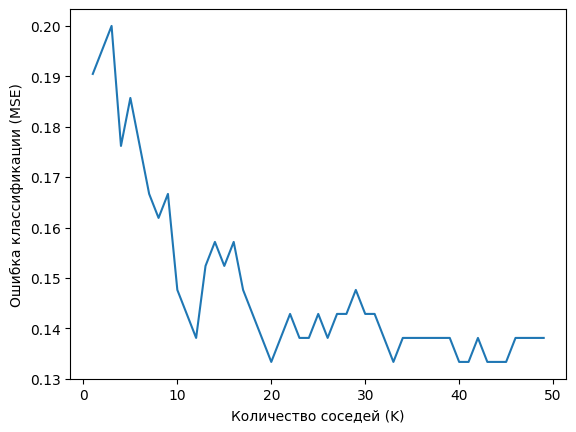

In [46]:
#Вычисление ошибки средней квадратичной ошибки (MSE)
MSE = [1 - x for x in cv_scores]

# Находим индекс минимального значения MSE
min_mse_idx = np.argmin(MSE)

# Получаем оптимальное значение K
optimal_k = k_list[min_mse_idx]

#Построение графика зависимости MSE от K
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

Определение и вывод оптимального значения K, соответствующего минимальной MSE

In [47]:
all_k_min = [k_list[i] for i in np.where(np.array(MSE) == MSE[min_mse_idx])[0]]
print('Оптимальное значение K:', all_k_min)

Оптимальное значение K: [20, 33, 40, 41, 43, 44, 45]


Вычисление оптимального значения K

In [48]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(d.iloc[:, 0:7], d['Type'], test_size=0.2)

# Создание экземпляра классификатора KNN с оптимальным значением K
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Обучение классификатора на обучающем наборе
knn.fit(X_train, y_train)

# Предсказание меток классов для тестового набора
y_pred = knn.predict(X_test)

# Оценка точности классификатора на тестовом наборе
accuracy = accuracy_score(y_test, y_pred)
print('Оптимальное значение K:', optimal_k)
print('Точность классификатора на тестовом наборе:', accuracy)

Оптимальное значение K: 20
Точность классификатора на тестовом наборе: 0.9047619047619048


## Контрольные вопросы

### **1. Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод К ближайших соседей.**

Метод ближайшего соседа (nearest neighbor) - это один из простейших методов классификации, основанный на принципе близости объектов. При классификации нового объекта он относится к классу, к которому принадлежит ближайший обучающий объект. Основные особенности метода ближайшего соседа:

Простота реализации и понимания.
Не требует предварительной обработки данных или построения модели.
Чувствителен к выбросам и шуму в данных.
Неэффективен на больших объемах данных из-за необходимости вычисления расстояний до всех обучающих объектов.
Метод К ближайших соседей (K-nearest neighbors) - расширение метода ближайшего соседа, где объект относится к классу на основе голосования среди K ближайших соседей. Основные особенности метода К ближайших соседей:

Параметр К определяет количество соседей, учитываемых при классификации.
Позволяет улучшить результаты классификации по сравнению с методом ближайшего соседа.
Требует выбора оптимального значения К, которое может быть определено с использованием кросс-валидации.
При увеличении значения К увеличивается сглаживание границ между классами, что может привести к уменьшению точности классификации.

### **2. Поясните основные принципы и этапы реализации метода kNN.**

Принципы:
1. Принцип близости: объекты, близкие в пространстве признаков, склонны принадлежать к одному классу.
2. Голосование: классификация нового объекта происходит путем голосования среди k ближайших соседей.

Этапы реализации:
1. Загрузка обучающего набора данных: необходимо иметь обучающую выборку с размеченными объектами и их классами.
2. Выбор параметра k: определение оптимального числа соседей k, которое обычно выбирается с помощью кросс-валидации.
3. Вычисление расстояний: для классификации нового объекта необходимо вычислить расстояния до всех объектов обучающей выборки.
4. Определение k ближайших соседей: выбор k объектов с наименьшими расстояниями до нового объекта.
5. Голосование: классификация нового объекта происходит путем голосования среди k ближайших соседей.
6. Присвоение класса: новому объекту присваивается класс, получивший наибольшее количество голосов.

### **3. Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.**

Принцип выбора количества соседних объектов (значения k) в методе k-ближайших соседей (kNN) играет важную роль в определении принадлежности целевого объекта к результирующему классу. Вот некоторые ключевые моменты:

1. **Переобучение и недообучение**: 
   - При маленьком значении k (например, k=1) модель может стать слишком сложной и подвержена переобучению, что может привести к плохой обобщающей способности.
   - При большом значении k модель может стать слишком простой и подвержена недообучению, что также может привести к плохим результатам.

2. **Оптимальное значение k**:
   - Выбор оптимального значения k обычно производится с использованием кросс-валидации, где данные разделяются на обучающий и тестовый наборы для оценки качества модели при разных значениях k.
   - Оптимальное значение k должно обеспечивать баланс между смещением (bias) и разбросом (variance) модели, чтобы достичь наилучшей обобщающей способности.

3. **Выбор четного значения k**:
   - При выборе четного значения k решается проблема голосования при равном количестве соседей разных классов.
   - В таком случае можно избежать неоднозначности при определении класса целевого объекта.

Таким образом, правильный выбор значения k в методе kNN является важным шагом для построения эффективной модели классификации, которая будет хорошо обобщать на новые данные.

### **4. В чем заключается метод парзеновского окна?**

Метод парзеновского окна (Parzen window) - это метод оценки плотности вероятности объектов в машинном обучении. Он используется в алгоритмах классификации, регрессии и кластеризации. Вот в чем заключается метод парзеновского окна:

1. **Оценка плотности вероятности**:
   - Метод парзеновского окна используется для оценки плотности вероятности объектов в пространстве признаков.
   - Он основан на принципе оценки плотности вероятности объекта как суммы весов, присвоенных каждому обучающему объекту в зависимости от расстояния до него.

2. **Парзеновское окно**:
   - Парзеновское окно представляет собой окно, которое центрируется вокруг объекта, для которого оценивается плотность вероятности.
   - Размер окна определяет, какие обучающие объекты будут учитываться при оценке плотности вероятности данного объекта.

3. **Функция ядра**:
   - Для вычисления весов используется функция ядра, которая определяет вес каждого обучающего объекта в зависимости от его расстояния до объекта, для которого оценивается плотность.
   - Различные функции ядра могут использоваться в методе парзеновского окна, такие как гауссовское ядро, прямоугольное ядро и т. д.

4. **Выбор размера окна**:
   - Один из ключевых аспектов метода парзеновского окна - выбор размера окна.
   - Слишком маленький размер окна может привести к переобучению, а слишком большой - к сглаживанию и потере деталей.

Таким образом, метод парзеновского окна позволяет оценить плотность вероятности объектов на основе их окружения и является одним из способов решения задачи оценки плотности вероятности в машинном обучении.

### **5. Поясните принцип метода потенциальных функций.**

Метод потенциальных функций (Potential Function Method) - это метод, который используется в задачах оптимизации и поиска оптимального решения. Принцип метода потенциальных функций заключается в следующем:

1. **Цель метода**:
   - Основная цель метода потенциальных функций - найти оптимальное решение задачи оптимизации или поиска, минимизируя целевую функцию.

2. **Идея метода**:
   - Метод потенциальных функций основан на идее преобразования задачи оптимизации с использованием дополнительной функции, называемой потенциальной функцией.
   - Потенциальная функция добавляется к целевой функции для улучшения сходимости алгоритма оптимизации.

3. **Потенциальная функция**:
   - Потенциальная функция представляет собой дополнительный член, который добавляется к целевой функции.
   - Ее выбор зависит от конкретной задачи и может быть спроектирован для ускорения сходимости оптимизационного процесса.

4. **Влияние на сходимость**:
   - Потенциальная функция может ускорить сходимость алгоритма оптимизации, помогая избежать локальных минимумов и улучшая общее качество найденного решения.
   - Она может служить для управления шагом оптимизации, изменения направления движения или регулирования скорости сходимости.

5. **Применение**:
   - Метод потенциальных функций широко применяется в различных областях, таких как искусственный интеллект, оптимизация, робототехника и другие, где требуется поиск оптимального решения.

Таким образом, метод потенциальных функций представляет собой эффективный подход к решению задач оптимизации, который использует дополнительные функции для улучшения сходимости алгоритмов и нахождения оптимального решения.

### **6. Назовите, какие параметры оптимизируют в методах kNN?**

В методах k-ближайших соседей (kNN) оптимизируют следующие параметры:

1. **Параметр k**:
   - Один из основных параметров, который оптимизируют в методе kNN, это значение параметра k, то есть количество ближайших соседей, учитываемых при классификации нового объекта.
   - Выбор оптимального значения k влияет на качество классификации и способность модели обобщать на новые данные.

2. **Функция расстояния**:
   - В методе kNN используется функция расстояния для измерения близости между объектами в пространстве признаков.
   - Выбор оптимальной функции расстояния (например, евклидово расстояние, манхэттенское расстояние, косинусное расстояние) также влияет на результаты классификации.

3. **Веса соседей**:
   - Некоторые варианты метода kNN позволяют учитывать веса соседей при голосовании, что может быть полезно в случаях, когда некоторые соседи более значимы чем другие.
   - Оптимизация весов соседей может улучшить точность классификации.

4. **Нормализация признаков**:
   - Нормализация признаков также может играть важную роль в оптимизации метода kNN.
   - Нормализация помогает привести признаки к одному масштабу и улучшить работу алгоритма.

Таким образом, параметры, которые оптимизируют в методах k-ближайших соседей, включают значение k, функцию расстояния, веса соседей и нормализацию признаков для достижения лучших результатов классификации.

## Вывод

В ходе лабораторной работы были достигнуты следующие результаты:

1. Изучены принципы построения классификации информационных систем с использованием метрических методов.
2. Освоен инструментарий Python для реализации алгоритмов метрической классификации.
3. Изучены методы оптимизации параметров метрической классификации.
4. Освоены модификации в рамках работы.

Таким образом, проделанная работа позволила углубить знания в области классификации информационных систем с использованием метрических методов, освоить инструментарий Python для реализации алгоритмов классификации, изучить методы оптимизации параметров и овладеть различными модификациями в данной области.